# Workflow example 1:  To what extent are you a global citizen? 

### Steps ###
0. **Formulate Research Question**
1. **Determine which variable should be computed to answer RQ**
2. **Select raw data source**
3. **List available information in raw data source**
4. **Select required information to compute variable**
5. **Compute variable**
6. **Send result**
____________________________________________________________________________________________________________

In [2]:
import json
import pandas.io.json as pd_json
import os
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from pathlib import Path

In [3]:
proj_lib = Path.home().joinpath('anaconda3','share','proj')
os.environ['PROJ_LIB'] = str(proj_lib)
from mpl_toolkits.basemap import Basemap

### 0. Research Question

--> To what extent are you a global citizen?

### 1. Variable

--> visited places over time

### 2. Raw data source

_TODO: Interface to support the selection of suitable raw data source_

--> Google Location History

### 3. List available information

--> Google Location History

**Load data set**

In [4]:
one_drive = Path('/media/sf_vos00076/OneDrive - Universiteit Utrecht')
data_dir = one_drive / Path('Projects', 'data_donation','data')

In [5]:
json_file = data_dir / Path('Location History', 'Location History.json')

In [15]:
with open(json_file) as f:
    data =json.loads(f.read())

In [25]:
data

{'locations': [{'timestampMs': '1397133815401',
   'latitudeE7': 526166195,
   'longitudeE7': 46231730,
   'accuracy': 51,
   'activity': [{'timestampMs': '1397133765766',
     'activity': [{'type': 'STILL', 'confidence': 48},
      {'type': 'IN_VEHICLE', 'confidence': 38},
      {'type': 'UNKNOWN', 'confidence': 12}]}]},
  {'timestampMs': '1397133865013',
   'latitudeE7': 526166358,
   'longitudeE7': 46231747,
   'accuracy': 51},
  {'timestampMs': '1397133925137',
   'latitudeE7': 526166229,
   'longitudeE7': 46231253,
   'accuracy': 54},
  {'timestampMs': '1397133986640',
   'latitudeE7': 526166032,
   'longitudeE7': 46232852,
   'accuracy': 45},
  {'timestampMs': '1397134046643',
   'latitudeE7': 526166256,
   'longitudeE7': 46232071,
   'accuracy': 49},
  {'timestampMs': '1397134106667',
   'latitudeE7': 526166182,
   'longitudeE7': 46231687,
   'accuracy': 51},
  {'timestampMs': '1397134166725',
   'latitudeE7': 526166170,
   'longitudeE7': 46232478,
   'accuracy': 47},
  {'timest

### 4. Select required information

_TODO: Abovementioned interface should also support selection information_

In [49]:
df_gps = pd.read_json(json_file)

In [50]:
df_gps.head(5)

,locations
0,"{'timestampMs': '1397133815401', 'latitudeE7':..."
1,"{'timestampMs': '1397133865013', 'latitudeE7':..."
2,"{'timestampMs': '1397133925137', 'latitudeE7':..."
3,"{'timestampMs': '1397133986640', 'latitudeE7':..."
4,"{'timestampMs': '1397134046643', 'latitudeE7':..."


In [51]:
# parse lat, lon, and timestamp from the dict inside the locations column
df_gps['lat'] = df_gps['locations'].map(lambda x: x['latitudeE7'])
df_gps['lon'] = df_gps['locations'].map(lambda x: x['longitudeE7'])
df_gps['timestamp_ms'] = df_gps['locations'].map(lambda x: x['timestampMs'])

In [52]:
# convert lat/lon to decimalized degrees and the timestamp to date-time
df_gps['lat'] = df_gps['lat'] / 10.**7
df_gps['lon'] = df_gps['lon'] / 10.**7
df_gps['timestamp_ms'] = df_gps['timestamp_ms'].astype(float) / 1000
df_gps['datetime'] = df_gps['timestamp_ms'].map(lambda x: dt.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
date_range = '{}-{}'.format(df_gps['datetime'].min()[:4], df_gps['datetime'].max()[:4])

In [53]:
# drop columns we don't need
df_gps = df_gps.drop(labels=['locations', 'timestamp_ms'], axis=1, inplace=False)

In [55]:
df_gps.head(5)

,lat,lon,datetime
0,52.616619,4.623173,2014-04-10 14:43:35
1,52.616636,4.623175,2014-04-10 14:44:25
2,52.616623,4.623125,2014-04-10 14:45:25
3,52.616603,4.623285,2014-04-10 14:46:26
4,52.616626,4.623207,2014-04-10 14:47:26


### 5. Compute variable


**Plot data on world map**

In [56]:
# define map colors
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#f5f5f3'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

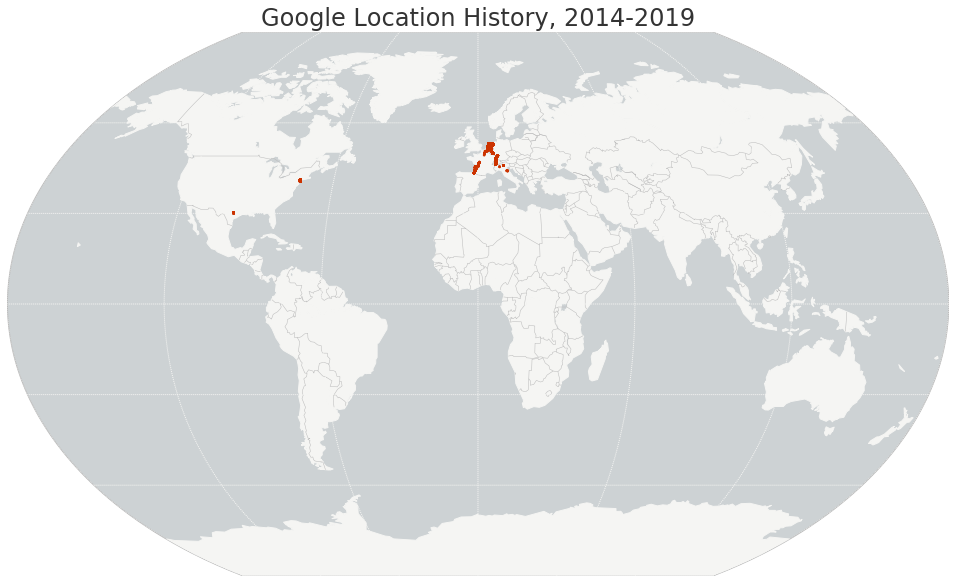

In [57]:
# create the plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Google Location History, {}'.format(date_range), fontsize=24, color='#333333')

# draw the basemap and its features
m = Basemap(projection='kav7', lon_0=0, resolution='c', area_thresh=10000)
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

# project the location history points then scatter plot them
x, y = m(df_gps['lon'].values, df_gps['lat'].values)
m.scatter(x, y, s=8, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=3)

# show the map
plt.savefig('google_location_history_world_map.png', dpi=96, bbox_inches='tight', pad_inches=0.2)
plt.show()

##  Plot data on Europe map

In [58]:
# first define a transverse mercator projection for california
map_width_m = 2000 * 2000
map_height_m = 2200 * 2000
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':-4,
              'lat_0':52}

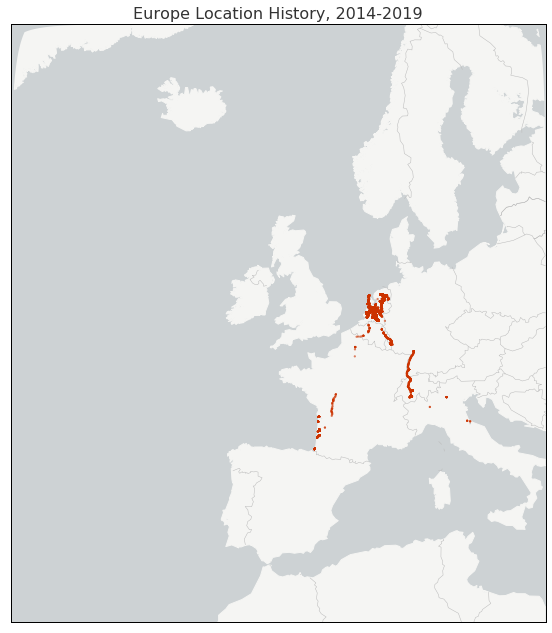

In [59]:
# plot the map
fig_width = 10
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Europe Location History, {}'.format(date_range), fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l',
            area_thresh=10000)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(df_gps['lon'].values, df_gps['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=0.6, zorder=3)

plt.savefig('google_location_history_eur_map.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()